# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [14]:
#Your code here
#Your code here
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [4]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/drive/MyDrive/data",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)
#Your code here

Found 1678 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [5]:
data_iterator=data.as_numpy_iterator()

In [9]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

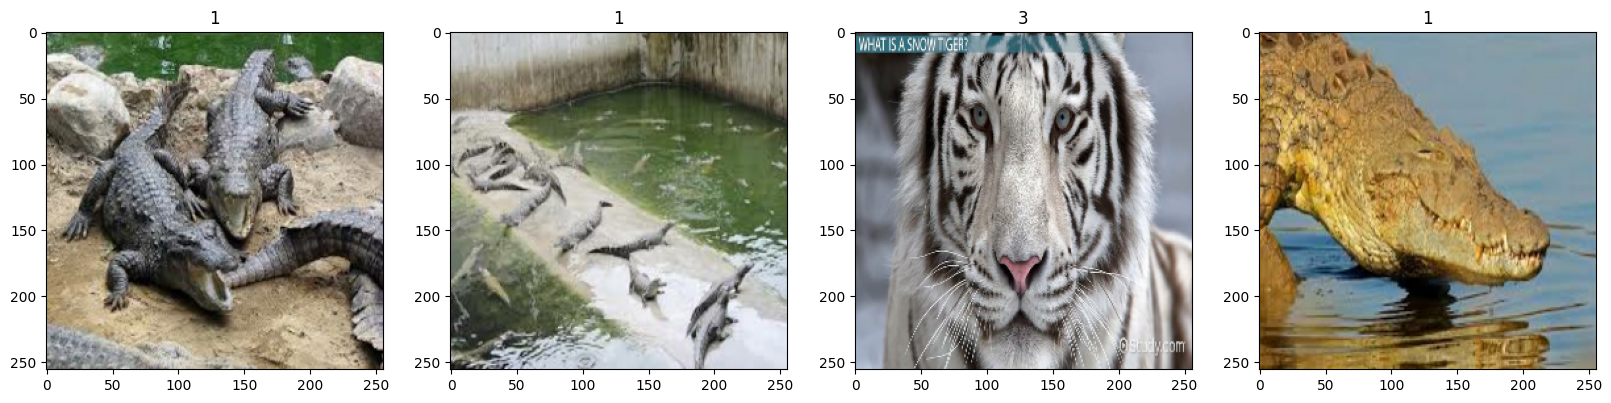

In [15]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [16]:
normalization_layer = layers.Rescaling(1./255)
data=data.map(lambda x, y: (normalization_layer(x), y))

[link text](
)**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [26]:
#Your code here

total_batches = tf.data.experimental.cardinality(data).numpy()

# Define split ratios
train_ratio = 0.8
test_ratio = 0.2
# Calculate the number of batches for each set
train_batches = int(total_batches * train_ratio)
test_batches = int(total_batches * test_ratio)

train_data = data.take(train_batches)
test_data = data.skip(train_batches).take(test_batches)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [30]:
model= Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(4, activation = 'softmax')

])

**Q.6** Compile your model

In [31]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [32]:
model.fit(train_data , epochs=10 ,batch_size=64 )

Epoch 1/10
42/42 [==============================] - 35s 717ms/step - loss: 2.4103 - accuracy: 0.3065
Epoch 2/10
42/42 [==============================] - 13s 264ms/step - loss: 1.1777 - accuracy: 0.4955
Epoch 3/10
42/42 [==============================] - 13s 268ms/step - loss: 0.7358 - accuracy: 0.7202
Epoch 4/10
42/42 [==============================] - 13s 265ms/step - loss: 0.3610 - accuracy: 0.8876
Epoch 5/10
42/42 [==============================] - 13s 265ms/step - loss: 0.1811 - accuracy: 0.9554
Epoch 6/10
42/42 [==============================] - 13s 250ms/step - loss: 0.0939 - accuracy: 0.9784
Epoch 7/10
42/42 [==============================] - 13s 267ms/step - loss: 0.0576 - accuracy: 0.9888
Epoch 8/10
42/42 [==============================] - 13s 268ms/step - loss: 0.0442 - accuracy: 0.9948
Epoch 9/10
42/42 [==============================] - 13s 232ms/step - loss: 0.0187 - accuracy: 0.9970
Epoch 10/10
42/42 [==============================] - 13s 262ms/step - loss: 0.0250 - accura

**Q.8** Test your code with test set

In [33]:
loss,accuracy=model.evaluate(test_data)

10/10 [==============================] - 18s 500ms/step - loss: 0.4820 - accuracy: 0.8938


In [34]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.893750011920929


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**